# Introduction

<b>Objective:</b> Evaluate the potential for substance abuse in patients undergoing drug treatment by analyzing demographic data, personality traits, and prior drug use history through AI and machine learning methodologies.

In the introductory phase, we will load and preprocess the dataset, addressing any missing values and data type discrepancies. This will be followed by an exploratory data analysis (EDA) to derive statistical insights on key features and to visualize data distributions and inter-feature relationships.

## Dataset Information

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Detailed description of database and process of data quantification are presented in E. Fehrman, A. K. Muhammad, E. M. Mirkes, V. Egan and A. N. Gorban, "The Five Factor Model of personality and evaluation of drug consumption risk.," arXiv [Web Link], 2015
Paper above solve binary classification problem for all drugs. For most of drugs sensitivity and specificity are greater than 75%

Since all of the features have been quantified into real values please refer to the link to the original dataset to get more clarity on categorical variables. For example, for EScore (extraversion) 9 people scored 55 which corresponds to a quantified (real) value of in the dataset 2.57309. I have also converted some variables back into their categorical values which are included in the drug_consumption.csv file

## Feature Attributes

**1. ID:** is a number of records in an original database. Cannot be related to the participant. It can be used for reference only.  
**2. Age (Real):** is the age of participant  
**3. Gender:** Male or Female  
**4. Education:** level of education of participant  
**5. Country:** country of origin of the participant  
**6. Ethnicity:** ethnicity of participant  
**7. Nscore (Real):** is NEO-FFI-R Neuroticism  
**8. Escore (Real):** is NEO-FFI-R Extraversion  
**9. Oscore (Real):** is NEO-FFI-R Openness to experience.  
**10. Ascore (Real):** is NEO-FFI-R Agreeableness.  
**11. Cscore (Real):** is NEO-FFI-R Conscientiousness.  
**12. Impulsive (Real):** is impulsiveness measured by BIS-11  
**13. SS (Real):** is sensation seeing measured by ImpSS  
**14. Alcohol:** alcohol consumption  
**15. Amphet:** amphetamines consumption  
**16. Amyl:** nitrite consumption  
**17. Benzos:** benzodiazepine consumption  
**18. Caff:** caffeine consumption  
**19. Cannabis:** marijuana consumption  
**20. Choc:** chocolate consumption  
**21. Coke:** cocaine consumption  
**22. Crack:** crack cocaine consumption  
**23. Ecstasy:** ecstasy consumption  
**24. Heroin:** heroin consumption  
**25. Ketamine:** ketamine consumption  
**26. Legalh:** legal highs consumption  
**27. LSD:** LSD consumption  
**28. Meth:** methadone consumption  
**29. Mushroom:** magic mushroom consumption  
**30. Nicotine:** nicotine consumption  
**31. Semer:** class of fictitious drug Semeron consumption (i.e. control)  
**32. VSA:** class of volatile substance abuse consumption  


## Rating's for Drug Use:

- **CL0:** Never Used
- **CL1:** Used over a Decade Ago
- **CL2:** Used in Last Decade
- **CL3:** Used in Last Year
- **CL4:** Used in Last Month
- **CL5:** Used in Last Week
- **CL6:** Used in Last Day


For more information about the dataset visit the following link: [Drug Consumption (UCI)](https://www.kaggle.com/datasets/obeykhadija/drug-consumptions-uci)

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Drug_Consumption.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [2]:
# Checking for missing values
missing_values = data.isnull().sum()

# Analyzing the distribution of demographic information
age_distribution = data['Age'].value_counts()
gender_distribution = data['Gender'].value_counts()
education_distribution = data['Education'].value_counts()
country_distribution = data['Country'].value_counts()
ethnicity_distribution = data['Ethnicity'].value_counts()

# Displaying the results of the missing values and demographic distributions
missing_values, age_distribution, gender_distribution, education_distribution, country_distribution, ethnicity_distribution


(ID           0
 Age          0
 Gender       0
 Education    0
 Country      0
 Ethnicity    0
 Nscore       0
 Escore       0
 Oscore       0
 AScore       0
 Cscore       0
 Impulsive    0
 SS           0
 Alcohol      0
 Amphet       0
 Amyl         0
 Benzos       0
 Caff         0
 Cannabis     0
 Choc         0
 Coke         0
 Crack        0
 Ecstasy      0
 Heroin       0
 Ketamine     0
 Legalh       0
 LSD          0
 Meth         0
 Mushrooms    0
 Nicotine     0
 Semer        0
 VSA          0
 dtype: int64,
 Age
 18-24    643
 25-34    481
 35-44    355
 45-54    294
 55-64     93
 65+       18
 Name: count, dtype: int64,
 Gender
 M    943
 F    941
 Name: count, dtype: int64,
 Education
 Some college or university, no certificate or degree    506
 University degree                                       480
 Masters degree                                          283
 Professional certificate/ diploma                       269
 Left school at 18 years                     

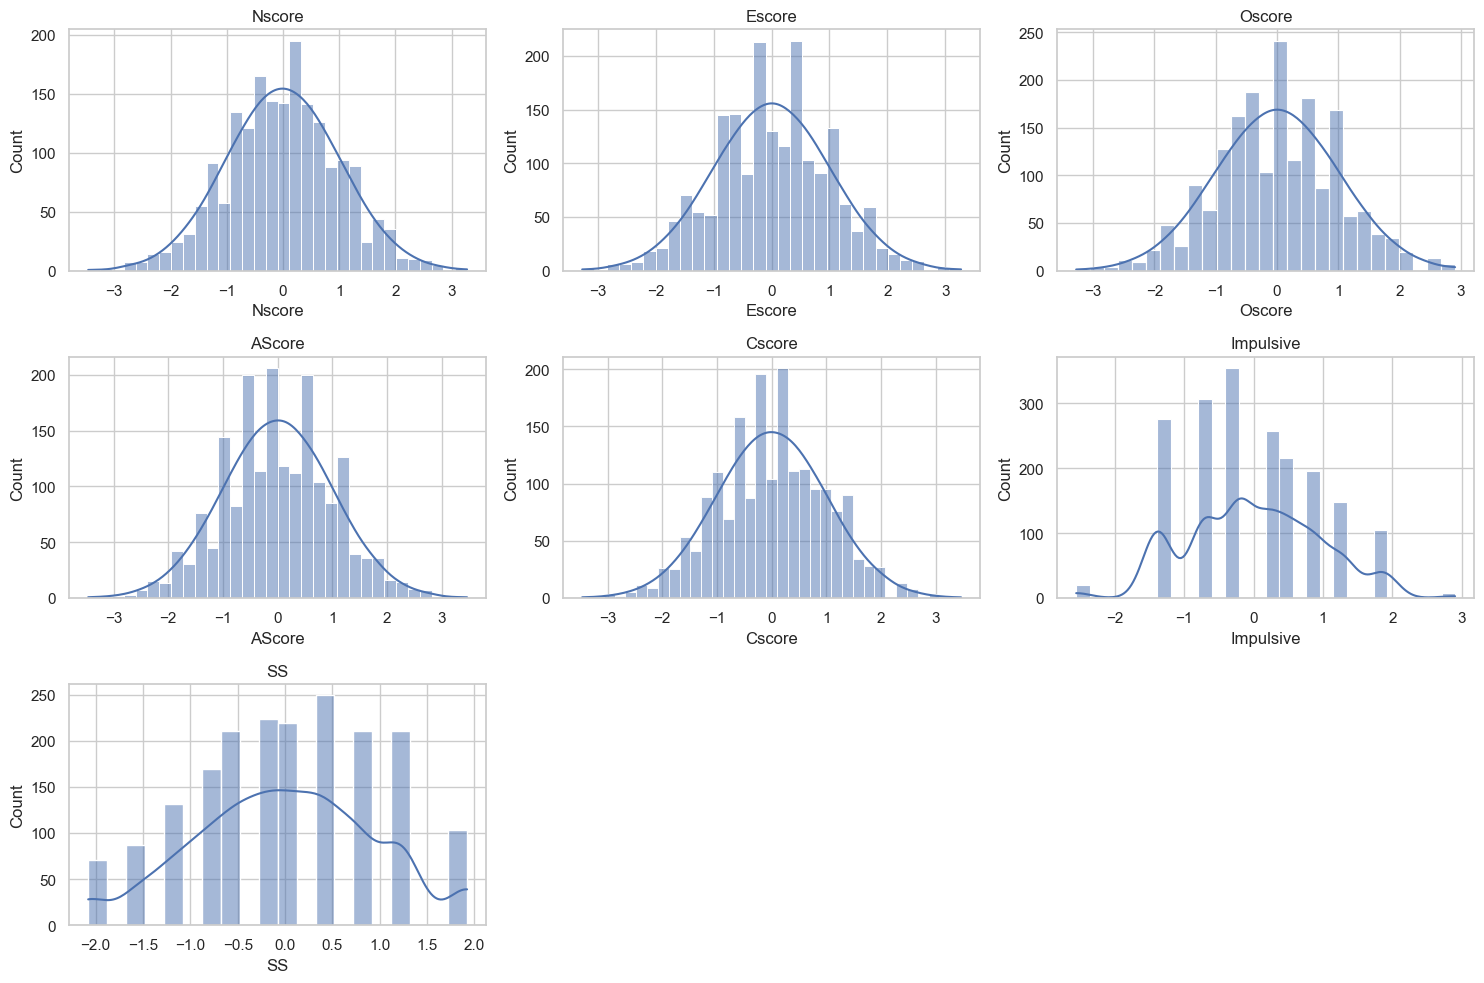

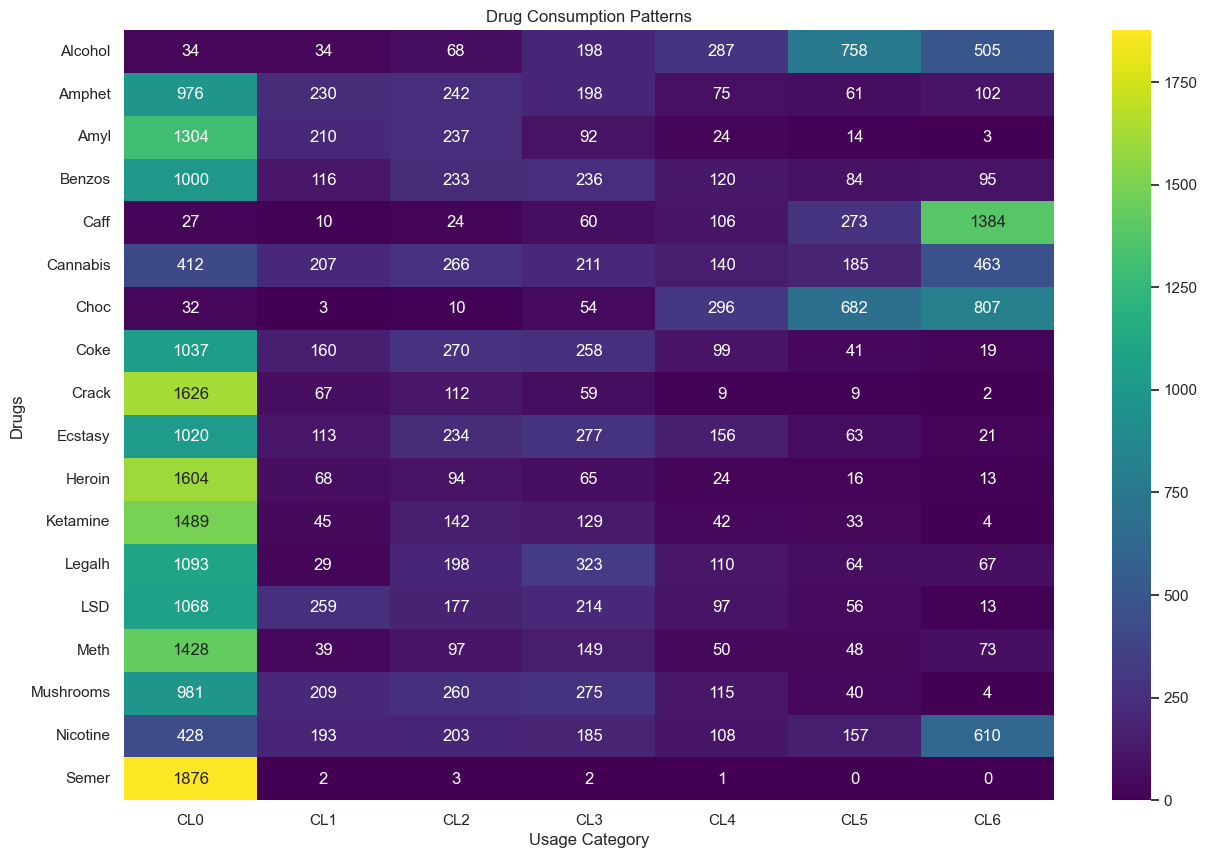

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Personality scores distribution
personality_scores = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
plt.figure(figsize=(15, 10))

for i, column in enumerate(personality_scores, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

# Drug consumption patterns
drug_columns = data.columns[13:-1] 

# Count of each category per drug
drug_usage = data[drug_columns].apply(pd.Series.value_counts).T
drug_usage_int = drug_usage.fillna(0).astype(int)

# Plotting drug consumption patterns
plt.figure(figsize=(15, 10))
sns.heatmap(drug_usage_int, cmap="viridis", annot=True, fmt="d")
plt.title("Drug Consumption Patterns")
plt.ylabel("Drugs")
plt.xlabel("Usage Category")
plt.show()

# Feature Engineering and Selection 

This section focuses on developing new features from the existing dataset and applying one-hot encoding to categorical variables, optimizing them for model training and evaluation.

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Initialize LabelEncoder
label_encoder = LabelEncoder()

columns_to_encode = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
                'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA',
                     'Age', 'Gender', 'Education', 'Country', 'Ethnicity']

# List of all drug columns
drug_columns = [col for col in data.columns if col not in ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']]

# List of additional variables to include in the features
additional_variables = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']

# Dictionary to store the training and testing sets for each drug
datasets = {}

# Preparing datasets for each drug
for drug in drug_columns:
    # Features: demographic, personality scores, and other drug columns except the current one
    feature_columns = additional_variables + [d for d in drug_columns if d != drug]
    X = data[feature_columns]
    #print(X.columns) #Columns to predict
    X = pd.get_dummies(X, columns=columns_to_encode.remove(drug)) #do one hot encoding

    # Convert current drug consumption into binary format
    # Target
    y = data[drug].apply(lambda x: 0 if x == 'CL0' else 1)

    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Store the datasets
    datasets[drug] = (X_train, X_test, y_train, y_test)

# We can now iterate over the datasets dictionary to train and evaluate models for each drug

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Amphet',
       'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')
Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')
Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushroo

# Model Building

In this segment, we will construct individual predictive models for each of the 19 drugs of interest, utilizing the cleaned and preprocessed training data. We employ scikit-learn as our primary toolkit for model development. To enhance the robustness of our predictions, we will implement four distinct machine learning algorithms—**Logistic Regression, Random Forest Classifier, SVM, and KNN**—with both default parameters and hyperparameters for each drug model thus producing a total count of 76 models.

In [5]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
knn = KNeighborsClassifier()

# Dictionary to store models
models = {
    "Logistic Regression": log_reg,
    "Random Forest": random_forest,
    "SVM": svm,
    "KNN": knn
}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Ensure data is contiguous in memory
    X_train_contiguous = np.ascontiguousarray(X_train)
    X_test_contiguous = np.ascontiguousarray(X_test)

    model.fit(X_train_contiguous, y_train)
    y_pred = model.predict(X_test_contiguous)
    y_proba = model.predict_proba(X_test_contiguous)[:, 1]  # Probability estimates for ROC curve

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    return accuracy, f1, roc_auc, y_proba

# Selecting a subset of drugs for demonstration
# subset_drugs = ['Cannabis', 'Alcohol', 'Nicotine']  # We can replace this with drug_columns for all drugs

# Dictionary to store model performances for each drug
all_drug_performances = {}

# Training and evaluating models for each drug in the subset
for drug in drug_columns:
    X_train, X_test, y_train, y_test = datasets[drug]
    model_performance = {}

    for model_name, model in models.items():
        accuracy, f1, roc_auc, _ = evaluate_model(model, X_train, y_train, X_test, y_test)
        model_performance[model_name] = {"Accuracy": accuracy, "F1 Score": f1, "ROC AUC": roc_auc}

    all_drug_performances[drug] = model_performance

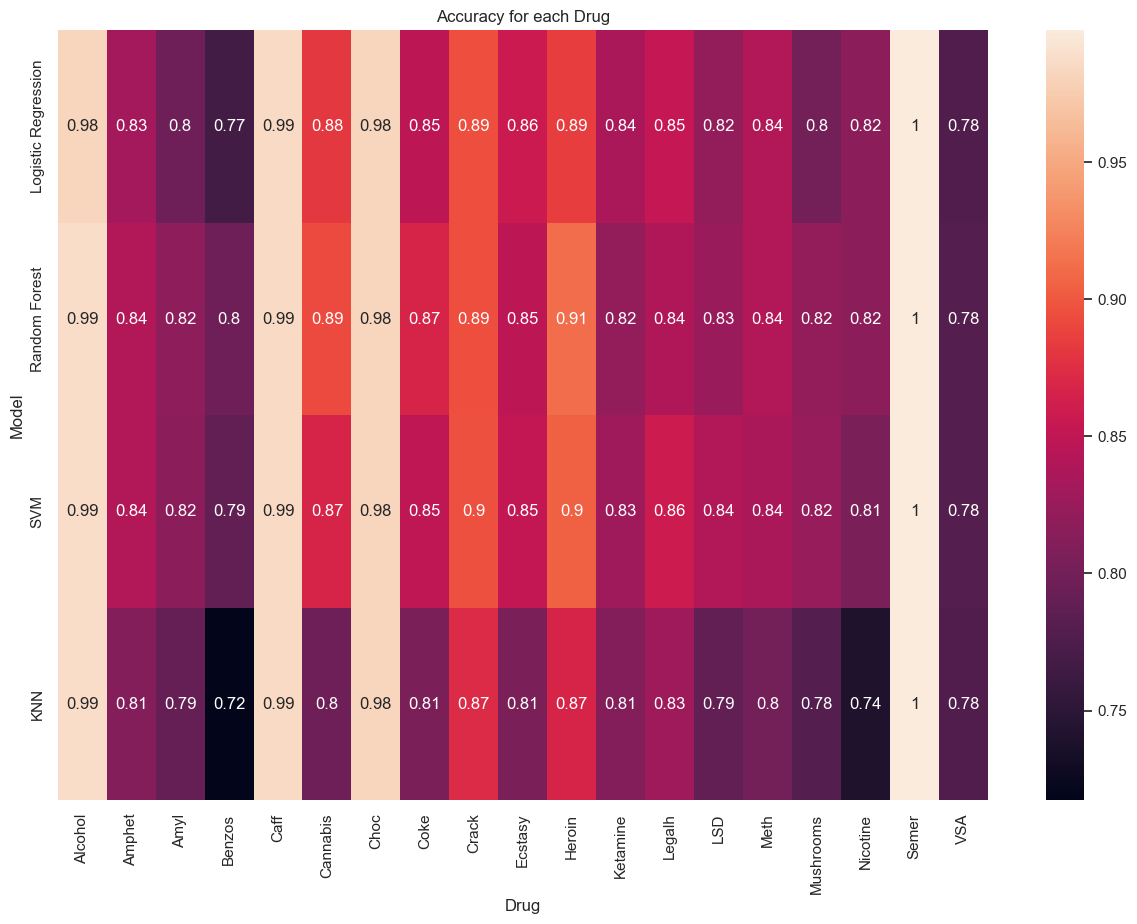

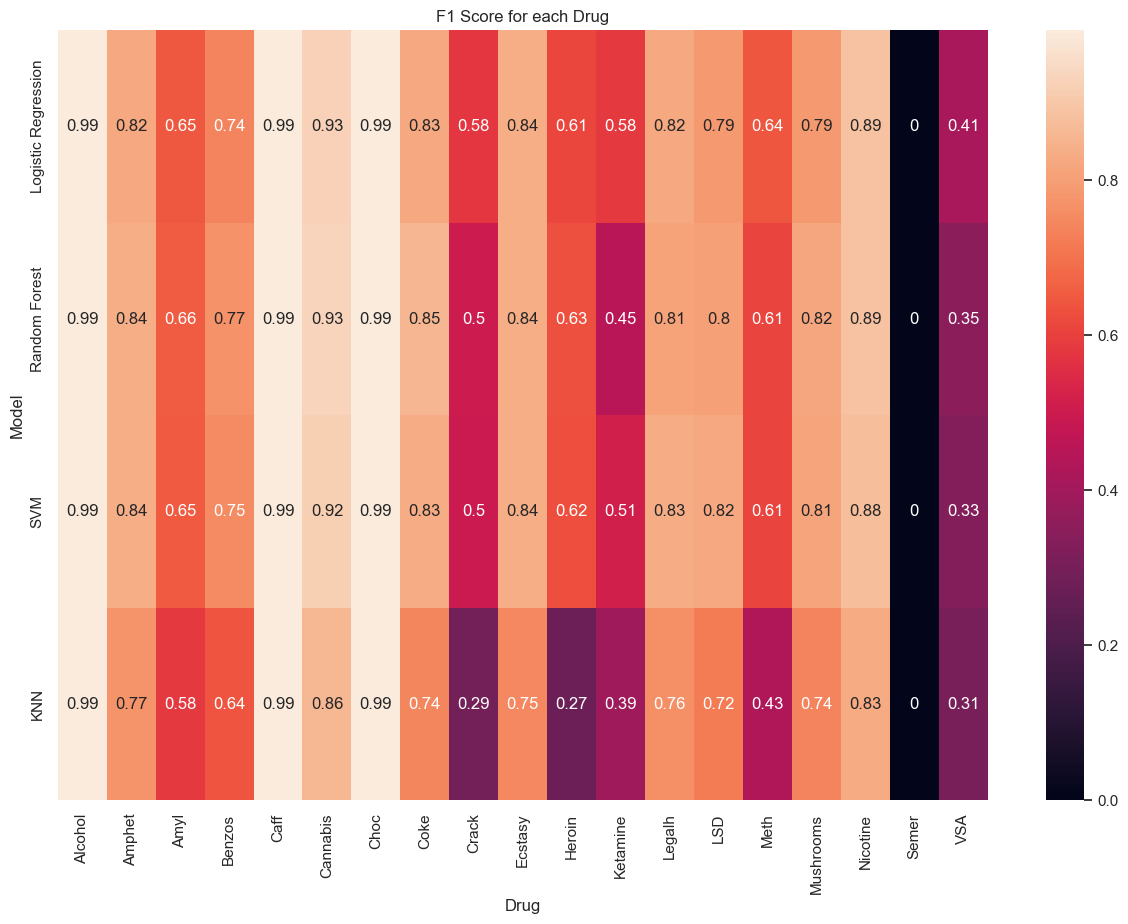

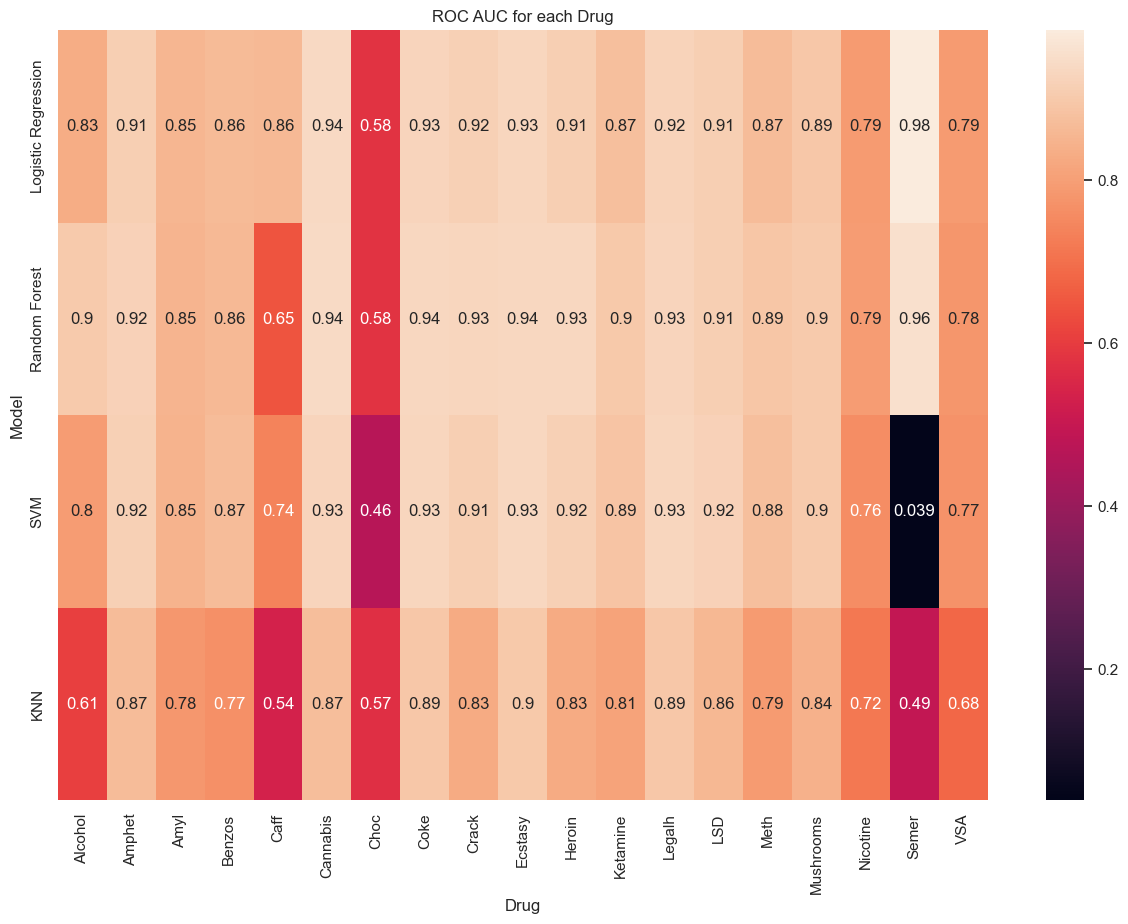

In [6]:
# Visualization of results
for metric in ['Accuracy', 'F1 Score', 'ROC AUC']:
    plt.figure(figsize=(15, 10))
    metric_results = {drug: {model: results[metric] for model, results in performances.items()}
                      for drug, performances in all_drug_performances.items()}
    
    sns.heatmap(pd.DataFrame(metric_results), annot=True)
    plt.title(f'{metric} for each Drug')
    plt.ylabel('Model')
    plt.xlabel('Drug')
    plt.show()

# Conclusion

Based on the provided visual data for the accuracy, F1 score, and ROC AUC across different models (Logistic Regression, Random Forest, SVM, and KNN), we can draw several conclusions about the predictive performance of each model for the various drugs.

### Model Robustness

- **Logistic Regression:** shows strength in the ROC AUC metric across drugs, suggesting it is effective at ranking its predictions and may be particularly useful when the cost of false negatives and false positives are different or when dealing with imbalanced datasets.

- **Random Forest:** seems to exhibit the most consistent accuracy across various drugs, indicating robustness in handling the dataset's variability.

- **SVM (Support Vector Machine):** may not be as consistent as the other models for all drugs, especially for Benzos and VSA. The model's performance on these drugs indicates that further investigation into feature selection or kernel choice may be necessary.

- **KNN (K-Nearest Neighbors):** exhibits strong predictive power for certain drugs, indicating that for these cases, the local similarity between instances is a good predictor of drug use. This might not hold for drugs where KNN's performance is lower, suggesting that the model may be less effective when the decision boundary is not well-defined by the k-nearest neighbors.

In light of these observations, while Random Forest and Logistic Regression demonstrate overall robustness, the choice of the model might still be influenced by the specific drug and the evaluation metric considered most critical for the application's needs.


## Top 5 Predictable Drugs

1. **Alcohol:** High scores across all models and metrics, indicating it's generally easier to predict alcohol use.

2. **Amphetamines (Amphet):** Consistently high accuracy and ROC AUC across models, suggesting clear patterns in the data for this drug.

3. **Cannabis:** High accuracy and F1 scores, especially with the Logistic Regression and Random Forest models.

4. **Ecstasy:** Random Forest and Logistic Regression models show high accuracy and F1 scores for this drug.

5. **Mushrooms:** Both accuracy and ROC AUC metrics are high for this drug, particularly in Random Forest and SVM models.


## Summary

When selecting a model for deployment, the choice might depend on the specific drug and the metric that is most important for the application. Random Forest stands out as a robust model across different drugs and metrics, making it a suitable general choice for this prediction task. Logistic Regression also proves to be a reliable model with consistent accuracy. SVM and KNN may be better suited for specific drugs where they show particularly high performance.

It's important to note that these conclusions are based on the provided visual data. For a more detailed analysis, we would need to examine the numerical values and the standard deviations of the metrics, as well as consider the balance of the classes in the dataset for each drug. Furthermore, the results are based on default parameters and hyperparameters; fine-tuning these could potentially improve the models' predictive performance.